In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv('stores_data.csv')

In [3]:
data.head()

,idnr,year,sales,space,municipality,pop
0,1,2004,110000,1095,136,71377
1,1,2005,110000,1095,136,71355
2,1,2006,110000,1095,136,71837
3,1,2007,120000,1095,136,72956
4,2,2004,35000,800,136,71377


In [4]:
data.describe()

,idnr,year,sales,space,municipality,pop
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,222.929245,2005.426550,49419.979784,789.382075,1437.848383,65177.612534
std,127.571855,1.116599,74272.979126,938.710562,752.381762,37334.325216
min,1.000000,2004.000000,750.000000,10.000000,136.000000,6551.000000
25%,115.000000,2004.000000,12500.000000,219.750000,1080.000000,31240.000000
50%,222.000000,2005.000000,22500.000000,440.000000,1283.000000,70430.500000
75%,333.250000,2006.000000,55000.000000,875.000000,2202.250000,102257.000000
max,444.000000,2007.000000,580000.000000,6000.000000,2584.000000,123389.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 6 columns):
idnr            1484 non-null int64
year            1484 non-null int64
sales           1484 non-null int64
space           1484 non-null int64
municipality    1484 non-null int64
pop             1484 non-null int64
dtypes: int64(6)
memory usage: 69.7 KB


In [6]:
print('different stores', data['idnr'].nunique())
print('years', data['year'].unique())
print('municipality', data['municipality'].nunique())

different stores 444
years [2004 2005 2006 2007]
municipality 25


# Q1 

What is the trend in the number AND the size of stores for the whole sample? Use municipalities as local markets. Present and discuss statistics of the number of the stores at the municipality level.

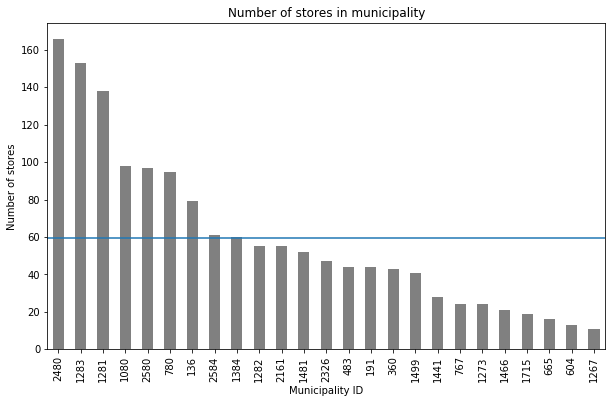

In [118]:
stores = data.groupby(by=['municipality'])['idnr'].agg(['count'])

mean_st = stores['count'].mean()
stores.sort_values(by='count',ascending=False).plot(kind='bar',
                                                    figsize=(10,6),
                                                    color='grey',
                                                    legend=False)
plt.xticks(rotation=90)
plt.xlabel('Municipality ID')
plt.ylabel('Number of stores')
plt.title('Number of stores in municipality')
plt.axhline(mean_st)

plt.savefig("Fig1.png")

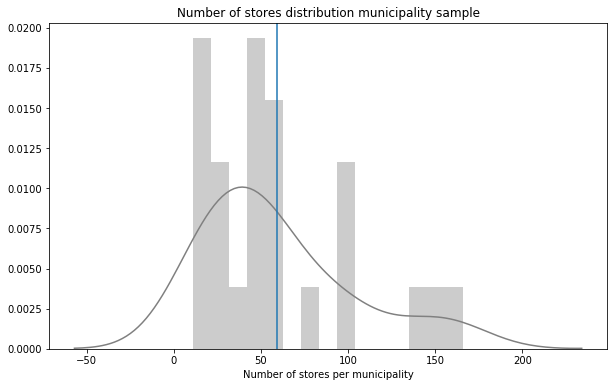

In [8]:
plt.figure(figsize=(10,6))
sb.distplot(stores['count'], bins=15, color='grey')
plt.title('Number of stores distribution municipality sample')
plt.xlabel('Number of stores per municipality')
plt.axvline(stores['count'].mean())

plt.savefig("Fig2.png")

In [9]:
stores.describe()

,count
count,25.000000
mean,59.360000
std,43.381909
min,11.000000
25%,24.000000
50%,47.000000
75%,79.000000
max,166.000000


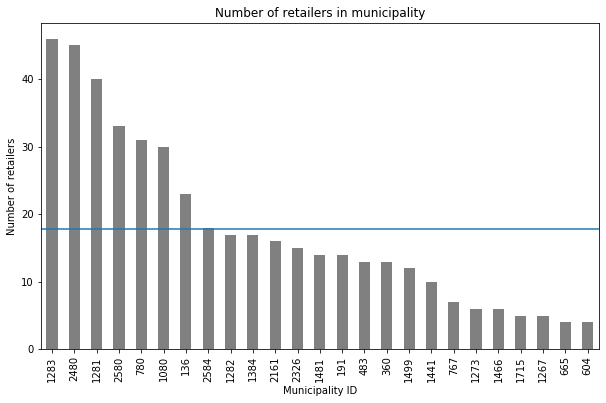

In [128]:
retailers = data.groupby(by=['municipality','idnr'])['idnr'].agg(['mean'])
retailersn = retailers.groupby(by='municipality')['mean'].count()

mean = retailersn.mean()

retailersn.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='grey')
plt.xticks(rotation=90)
plt.xlabel('Municipality ID')
plt.ylabel('Number of retailers')
plt.title('Number of retailers in municipality')
plt.axhline(mean)

plt.savefig("Fig3.png")

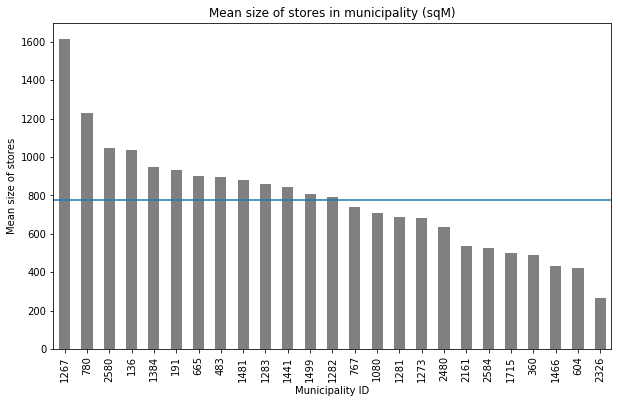

In [11]:
size = data.groupby(by=['municipality'])['space'].mean().sort_values(ascending=False)

mean_s = size.mean()
size.plot(kind='bar', figsize=(10,6), color='grey')
plt.xticks(rotation=90)
plt.xlabel('Municipality ID')
plt.ylabel('Mean size of stores')
plt.title('Mean size of stores in municipality (sqM)')
plt.axhline(mean_s)

plt.savefig("Fig4.png")

# Q2

Define entry and exit. What is the trent in the number of entrants and exiters during this period? Show summary statistics of entrances and exits at the municipality level. Are there numbers of entrances and exits correlated over time?

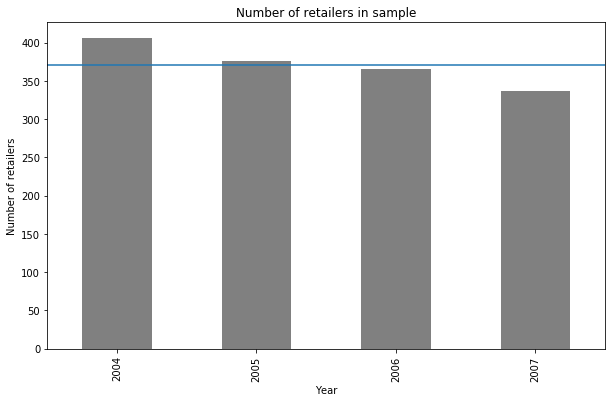

In [12]:
exit = data.groupby(by=['year','idnr'])['idnr'].agg(['mean'])
exitn = exit.groupby(by='year')['mean'].count().sort_values(ascending=False)

mean = exitn.mean()

exitn.plot(kind='bar', figsize=(10,6), color='grey')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of retailers')
plt.title('Number of retailers in sample')
plt.axhline(mean)

plt.savefig("Fig5.png")

In [13]:
data['yr_entry'] = np.where(data['year']==2004,1,
                           np.where(data['year']==2005,2,
                                   np.where(data['year']==2006,3,
                                           np.where(data['year']==2007,4,0))))


In [14]:
data['yr_entry'].value_counts()

1    406
2    376
3    365
4    337
Name: yr_entry, dtype: int64

In [15]:
pd.set_option('display.max_rows',500)
new_data = pd.pivot_table(data, values='yr_entry', index='idnr', columns='year')

In [16]:
new_data['sum'] = new_data[new_data.columns[0:4]].sum(axis=1)

In [17]:
new_data['sum'].value_counts()

10.0    304
1.0      46
6.0      36
3.0      21
9.0      13
4.0      10
7.0       9
2.0       3
5.0       2
Name: sum, dtype: int64

key for values in "sum":

 - 10: retailer started in 2004 and no exit
 - 9: retailer started in 2005 and no exit
 - 7: retailer started in 2006 and no exit
 - 6: 1) retailer started in 2004 and exit in 2007.
 - 5: 1) retailer started in 2005 and exited in 2007.
 - 4: 1) retailer started in 2007. 
 - 3: 1) retailer started in 2004 and exited in 2006, 2) retailer only worked in 2006
 - 2: retailer only worked in 2005
 - 1: retailer only worked in 2004
 
There are are few scenarios, I want to test and and potentially exclude:
- 5: retailer started in 2004, exited 2005 and restarted in 2007
- 4: retailer started in 2004, exited in 2005 and restarted in 2006, and exited in 2007.
- 6: retailer started in 2005, exited 2006, and restarted in 2007.

In [18]:
new_data[(new_data['sum']==5) & (new_data[2004]==1)]
#there is one case of reentry in 2007 after starting in 2004.

year,2004,2005,2006,2007,sum
idnr,,,,,
90,1.0,NaN,NaN,4.0,5.0


In [19]:
new_data[(new_data['sum']==4) & (new_data[2004]==1)]
#case that retailer started in 2004 and re=entered 2006 and exited in 2007 can be excluded.

year,2004,2005,2006,2007,sum
idnr,,,,,


In [20]:
new_data[(new_data['sum']==6) & (new_data[2007]==4)]
#case that the retailer only worked in 2005 and 2007 can be exlcuded.

year,2004,2005,2006,2007,sum
idnr,,,,,


In [21]:
new_data[(new_data['sum']==3) & (new_data[2006]==3)]
# three cases where the retailer only worked in 2006

year,2004,2005,2006,2007,sum
idnr,,,,,
189,NaN,NaN,3.0,NaN,3.0
329,NaN,NaN,3.0,NaN,3.0
412,NaN,NaN,3.0,NaN,3.0


In [22]:
#tackel entries and exits separately, since exits are defined by missing rows.
data['sum'] = data['yr_entry'].groupby(data['idnr']).transform('sum')

In [23]:
#using the key of definiitons from earlier:
data['entry'] = np.where(((data['sum']==10) & (data['year']==2004)) |
                         ((data['sum']==6) & (data['year']==2004)) |
                         ((data['sum']==5) & (data['year']==2004)) |
                         ((data['sum']==3) & (data['year']==2004)) |
                         ((data['sum']==1) & (data['year']==2004)) |
                         ((data['sum']==9) & (data['year']==2005)) |
                         ((data['sum']==5) & (data['year']==2005)) |
                         ((data['sum']==2) & (data['year']==2005)) |
                         ((data['sum']==7) & (data['year']==2006)) |
                         ((data['sum']==3) & (data['year']==2006)) |
                         ((data['sum']==4) & (data['year']==2007)) |
                         ((data['sum']==5) & (data['year']==2007)), 1,0)
data

,idnr,year,sales,space,municipality,pop,yr_entry,sum,entry
0,1,2004,110000,1095,136,71377,1,10,1
1,1,2005,110000,1095,136,71355,2,10,0
2,1,2006,110000,1095,136,71837,3,10,0
3,1,2007,120000,1095,136,72956,4,10,0
4,2,2004,35000,800,136,71377,1,1,1
...,...,...,...,...,...,...,...,...,...
1479,443,2007,4500,80,2584,23258,4,10,0
1480,444,2004,150000,1010,2584,23407,1,10,1
1481,444,2005,180000,5000,2584,23254,2,10,0
1482,444,2006,220000,5000,2584,23135,3,10,0


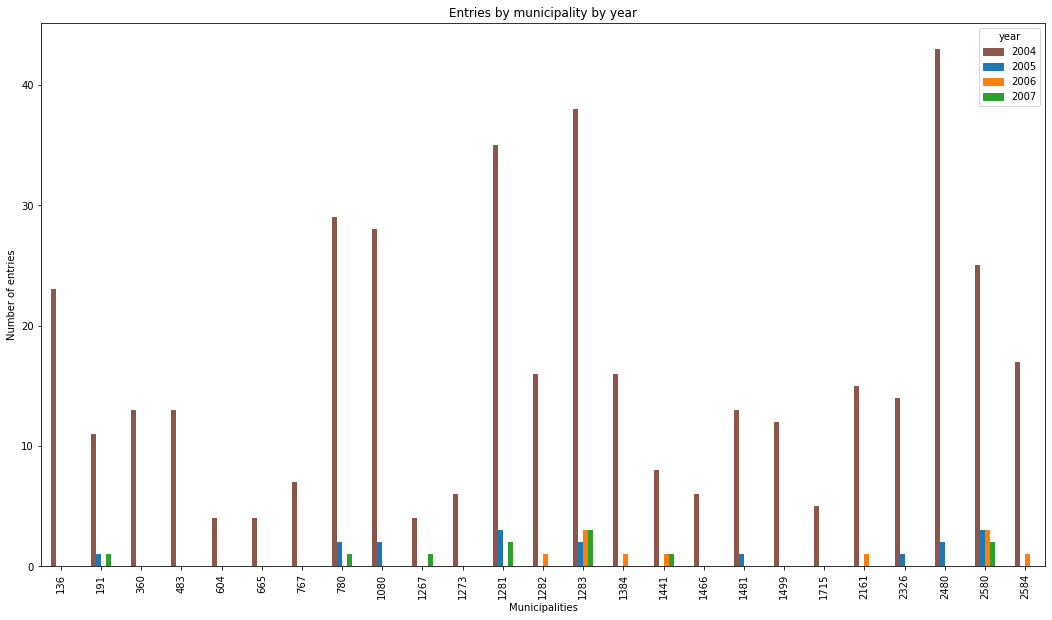

In [86]:
entry = data.pivot_table(index='municipality',columns='year', values='entry', aggfunc='sum')

mycolors = ['C5','C0', 'C1', 'C2']
leg = entry.plot(kind='bar', figsize=(18,10), color=mycolors).get_legend()
leg.legendHandles[0].set_color('C5')
leg.legendHandles[1].set_color('C0')
leg.legendHandles[2].set_color('C1')
leg.legendHandles[3].set_color('C2')


plt.title('Entries by municipality by year')
plt.ylabel('Number of entries')
plt.xlabel('Municipalities')

plt.savefig("Fig6.png")

In [91]:
print('2004 total entries:')
print(entry[2004].sum())
print('\n')
print('2005 total entries:')
print(entry[2005].sum())
print('\n')
print('2006 total entries:')
print(entry[2006].sum())
print('\n')
print('2007 total entries:')
print(entry[2007].sum())
print('\n')


2004 total entries:
405


2005 total entries:
17


2006 total entries:
11


2007 total entries:
11




In [98]:
entry['incumbents'] = entry[[2005,2006,2007]].sum(axis=1)

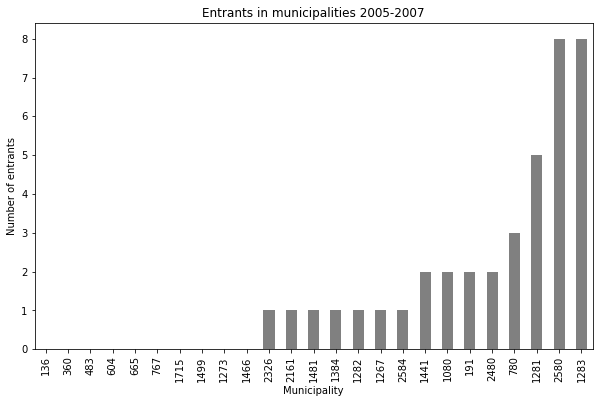

In [103]:
entry['incumbents'].sort_values().plot(kind='bar', figsize=(10,6), color='grey')
plt.title('Entrants in municipalities 2005-2007')
plt.xlabel('Municipality')
plt.ylabel('Number of entrants')
plt.savefig("Fig8.png")

In [108]:
entry = entry.drop('incumbents',axis=1)

I derive the number of exits pr municipality using the difference between stores in the previous year + new entries and stores in the next year.

In [105]:
test = data.pivot_table(index='municipality',columns='year', values='entry', aggfunc='count')
test =  test.add_prefix('count_')

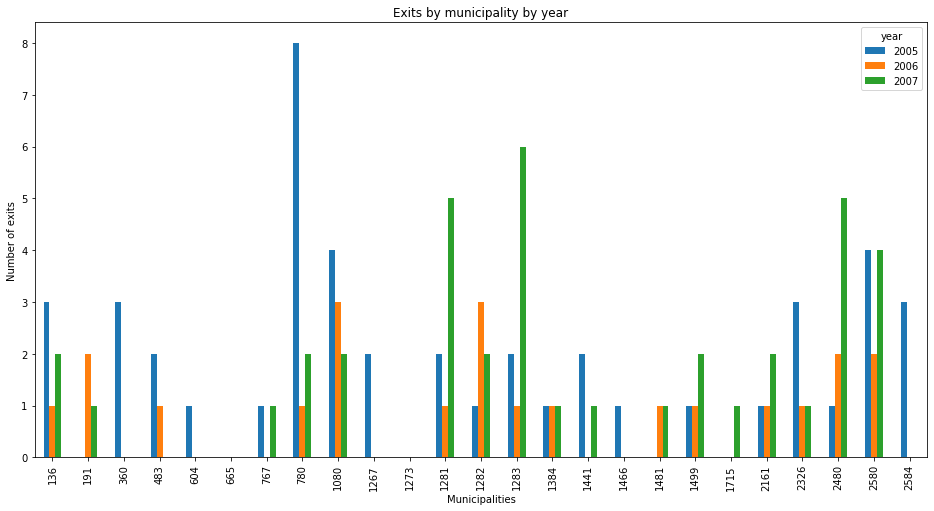

In [109]:
merge = pd.merge(entry, test, on='municipality')
merge[2005] = merge[2004] + merge[2005] - merge['count_2005']
merge[2006] = merge['count_2005'] + merge[2006] - merge['count_2006']
merge[2007] = merge['count_2006'] + merge[2007] - merge['count_2007']

merge = merge.drop([2004,'count_2004', 'count_2005', 'count_2006', 'count_2007'], axis=1)
merge.plot(kind='bar', figsize=(16,8))
plt.title('Exits by municipality by year')
plt.ylabel('Number of exits')
plt.xlabel('Municipalities')

plt.savefig("Fig7.png")

In [112]:
print('2005 total exits:')
print(merge[2005].sum())
print('\n')
print('2006 total exits:')
print(merge[2006].sum())
print('\n')
print('2007 total exits:')
print(merge[2007].sum())
print('\n')

2005 total exits:
46


2006 total exits:
22


2007 total exits:
39




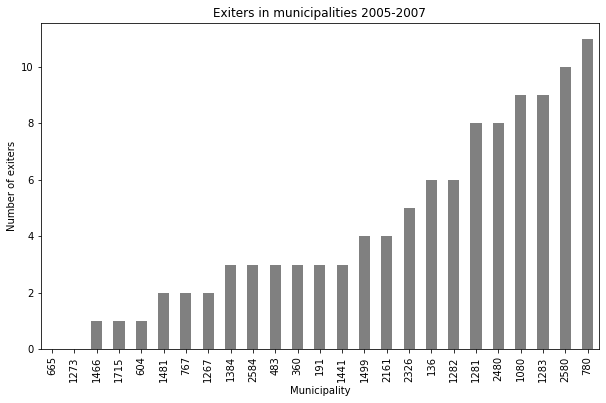

In [120]:
merge['no_exits'] = merge[[2005,2006,2007]].sum(axis=1)
exits = merge['no_exits']

exits.sort_values().plot(kind='bar', figsize=(10,6), color='grey')
plt.title('Exiters in municipalities 2005-2007')
plt.xlabel('Municipality')
plt.ylabel('Number of exiters')
plt.savefig("Fig9.png")

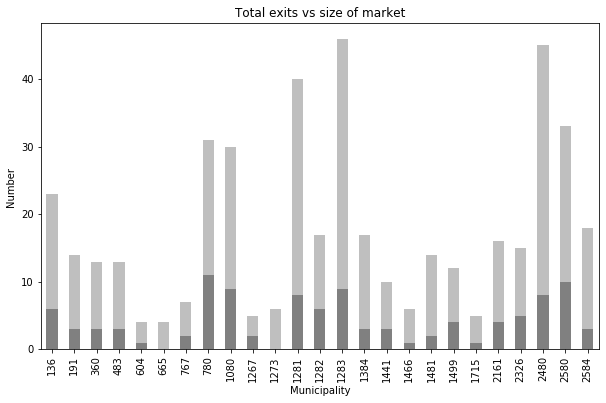

In [133]:
retailersn.plot(kind='bar', alpha=0.5, figsize=(10,6), color='grey')
exits.plot(kind='bar', figsize=(10,6), color='grey')
plt.title('Total exits vs size of market')
plt.xlabel('Municipality')
plt.ylabel('Number ')
plt.savefig("Fig13.png", dpi=100)
plt.show()



# Q3
Are there any differneces between incumbents, entrants and exits in terms of revenues, space and revenues per square meter? Show summary statistics and discuss findings.

In [27]:
#firstly, I will define incumbents as stores that appear in the set 4 times (for all years) - stable businesses.
#entrants will be defined as stores that appear in the set between 2-3 times
#exiters will be those that appear in the set once, since it indicates that these stores only showed up and did not stay.
data['count'] = data['idnr'].groupby(data['idnr']).transform('count')

In [28]:
#try several ways defining the variables for different types of stores
data['incumbent'] = np.where(data['count']==4,1,0)
data['entrant'] = np.where((data['count']==3) | (data['count']==2),1,0)
data['exiter'] = np.where(data['count']==1,1,0)

data['type_of_store'] = np.where((data['count']==4),1,
                                 np.where(((data['count']==3) | (data['count']==2)),2,
                                         np.where((data['count']==1),3,0)))

In [29]:
#revenues per square meter variables
data['revenues_sqm'] = data['sales']/data['space']

In [141]:
data[data['entrant']==1]['year'].value_counts()
#there are 56 "entrants" who started in 2004.

2005    69
2006    58
2004    56
2007    23
Name: year, dtype: int64

In [30]:
q3 = data.groupby(by='type_of_store')[['space', 'sales', 'revenues_sqm']].mean()
q3.columns

Index(['space', 'sales', 'revenues_sqm'], dtype='object')

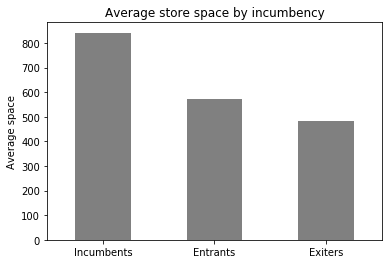

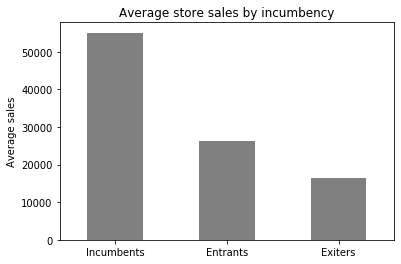

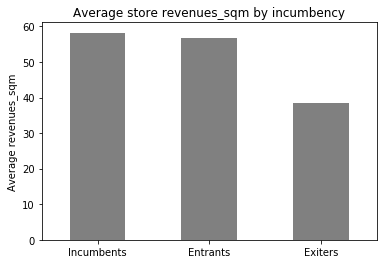

In [134]:
for x in q3.columns:
    q3[x].plot(kind='bar', color='grey')
    plt.xticks(rotation=0)
    plt.xticks([0, 1, 2], ['Incumbents', 'Entrants', 'Exiters'])
    plt.xlabel('')
    plt.ylabel('Average ' + x )
    plt.title('Average store ' + x + ' by incumbency')
    plt.savefig("Fig" + x + ".png") 
    plt.show()



# Q4
Compute entry and exit rates at the municipality level. Summarize and interpret results.

In [142]:
merge = pd.merge(entry, test, on='municipality')
merge.head()

year,2004,2005,2006,2007,count_2004,count_2005,count_2006,count_2007
municipality,,,,,,,,
136,23,0,0,0,23,20,19,17
191,11,1,0,1,12,12,10,10
360,13,0,0,0,13,10,10,10
483,13,0,0,0,13,11,10,10
604,4,0,0,0,4,3,3,3


In [143]:
#NE
merge.rename(columns={2005: 'NE_2005', 2006: 'NE_2006', 2007: 'NE_2007'}, inplace=True)

In [144]:
#NS
merge.rename(columns={'count_2004': 'NS_2004',
                      'count_2005': 'NS_2005',
                      'count_2006': 'NS_2006',
                      'count_2007': 'NS_2007'}, inplace=True)

In [145]:
#NX
merge['NX_2005'] = merge['NS_2004'] + merge['NE_2005'] - merge['NS_2005']
merge['NX_2006'] = merge['NS_2005'] + merge['NE_2006'] - merge['NS_2006']
merge['NX_2007'] = merge['NS_2006'] + merge['NE_2007'] - merge['NS_2007']

In [146]:
#ER
merge['ER_2005'] = merge['NE_2005']/merge['NS_2004']
merge['ER_2006'] = merge['NE_2006']/merge['NS_2005']
merge['ER_2007'] = merge['NE_2007']/merge['NS_2006']

In [147]:
#XR
merge['NX_2004'] = 0 #assume there are no stores that exit the market between 2003 and 2004
merge['XR_2005'] = merge['NX_2004']/merge['NS_2004']
merge['XR_2006'] = merge['NX_2005']/merge['NS_2005']
merge['XR_2007'] = merge['NX_2006']/merge['NS_2006']

In [148]:
merge.head()

year,2004,NE_2005,NE_2006,NE_2007,NS_2004,NS_2005,NS_2006,NS_2007,NX_2005,NX_2006,NX_2007,ER_2005,ER_2006,ER_2007,NX_2004,XR_2005,XR_2006,XR_2007
municipality,,,,,,,,,,,,,,,,,,
136,23,0,0,0,23,20,19,17,3,1,2,0.000000,0.0,0.0,0,0.0,0.150000,0.052632
191,11,1,0,1,12,12,10,10,1,2,1,0.083333,0.0,0.1,0,0.0,0.083333,0.200000
360,13,0,0,0,13,10,10,10,3,0,0,0.000000,0.0,0.0,0,0.0,0.300000,0.000000
483,13,0,0,0,13,11,10,10,2,1,0,0.000000,0.0,0.0,0,0.0,0.181818,0.100000
604,4,0,0,0,4,3,3,3,1,0,0,0.000000,0.0,0.0,0,0.0,0.333333,0.000000


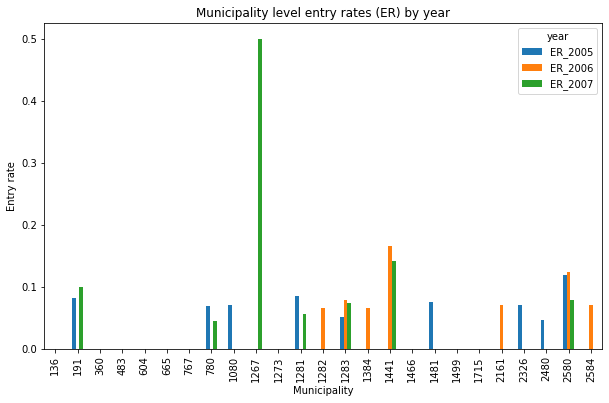

In [39]:
merge.groupby(by='municipality')[['ER_2005', 'ER_2006', 'ER_2007']].mean().plot(kind='bar',
                                                                               figsize=(10,6))
plt.title('Municipality level entry rates (ER) by year')
plt.xlabel('Municipality')
plt.ylabel('Entry rate')

plt.savefig("Fig10.png")

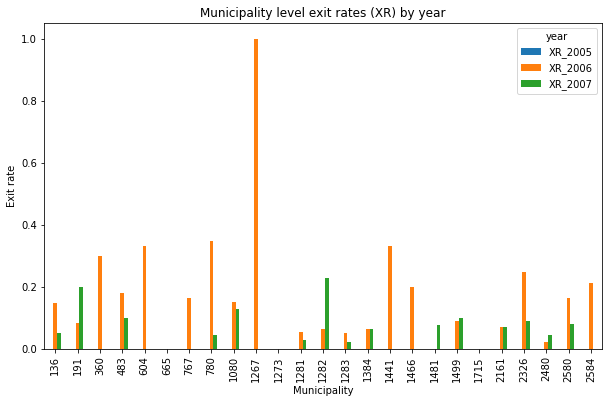

In [40]:
merge.groupby(by='municipality')[['XR_2005', 'XR_2006', 'XR_2007']].mean().plot(kind='bar',
                                                                               figsize=(10,6))
plt.title('Municipality level exit rates (XR) by year')
plt.xlabel('Municipality')
plt.ylabel('Exit rate')

plt.savefig("Fig11.png")

In [152]:
merge

year,2004,NE_2005,NE_2006,NE_2007,NS_2004,NS_2005,NS_2006,NS_2007,NX_2005,NX_2006,NX_2007,ER_2005,ER_2006,ER_2007,NX_2004,XR_2005,XR_2006,XR_2007
municipality,,,,,,,,,,,,,,,,,,
136,23,0,0,0,23,20,19,17,3,1,2,0.000000,0.000000,0.000000,0,0.0,0.150000,0.052632
191,11,1,0,1,12,12,10,10,1,2,1,0.083333,0.000000,0.100000,0,0.0,0.083333,0.200000
360,13,0,0,0,13,10,10,10,3,0,0,0.000000,0.000000,0.000000,0,0.0,0.300000,0.000000
483,13,0,0,0,13,11,10,10,2,1,0,0.000000,0.000000,0.000000,0,0.0,0.181818,0.100000
604,4,0,0,0,4,3,3,3,1,0,0,0.000000,0.000000,0.000000,0,0.0,0.333333,0.000000
665,4,0,0,0,4,4,4,4,0,0,0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000
767,7,0,0,0,7,6,6,5,1,0,1,0.000000,0.000000,0.000000,0,0.0,0.166667,0.000000
780,29,2,0,1,29,23,22,21,8,1,2,0.068966,0.000000,0.045455,0,0.0,0.347826,0.045455
1080,28,2,0,0,28,26,23,21,4,3,2,0.071429,0.000000,0.000000,0,0.0,0.153846,0.130435


# Q5, Q6
What are the determinants of entry/exit, i.e., what affects the likelihood of entry/exit.

In [42]:
data.head()

,idnr,year,sales,space,municipality,pop,yr_entry,sum,entry,count,incumbent,entrant,exiter,type_of_store,revenues_sqm
0,1,2004,110000,1095,136,71377,1,10,1,4,1,0,0,1,100.456621
1,1,2005,110000,1095,136,71355,2,10,0,4,1,0,0,1,100.456621
2,1,2006,110000,1095,136,71837,3,10,0,4,1,0,0,1,100.456621
3,1,2007,120000,1095,136,72956,4,10,0,4,1,0,0,1,109.589041
4,2,2004,35000,800,136,71377,1,1,1,1,0,0,1,3,43.750000


In [43]:
merge.head()

year,2004,NE_2005,NE_2006,NE_2007,NS_2004,NS_2005,NS_2006,NS_2007,NX_2005,NX_2006,NX_2007,ER_2005,ER_2006,ER_2007,NX_2004,XR_2005,XR_2006,XR_2007
municipality,,,,,,,,,,,,,,,,,,
136,23,0,0,0,23,20,19,17,3,1,2,0.000000,0.0,0.0,0,0.0,0.150000,0.052632
191,11,1,0,1,12,12,10,10,1,2,1,0.083333,0.0,0.1,0,0.0,0.083333,0.200000
360,13,0,0,0,13,10,10,10,3,0,0,0.000000,0.0,0.0,0,0.0,0.300000,0.000000
483,13,0,0,0,13,11,10,10,2,1,0,0.000000,0.0,0.0,0,0.0,0.181818,0.100000
604,4,0,0,0,4,3,3,3,1,0,0,0.000000,0.0,0.0,0,0.0,0.333333,0.000000


In [44]:
merge = merge.groupby(by='municipality')[merge.columns[1:]].mean()

In [45]:
merge

year,NE_2005,NE_2006,NE_2007,NS_2004,NS_2005,NS_2006,NS_2007,NX_2005,NX_2006,NX_2007,ER_2005,ER_2006,ER_2007,NX_2004,XR_2005,XR_2006,XR_2007
municipality,,,,,,,,,,,,,,,,,
136,0,0,0,23,20,19,17,3,1,2,0.000000,0.000000,0.000000,0,0.0,0.150000,0.052632
191,1,0,1,12,12,10,10,1,2,1,0.083333,0.000000,0.100000,0,0.0,0.083333,0.200000
360,0,0,0,13,10,10,10,3,0,0,0.000000,0.000000,0.000000,0,0.0,0.300000,0.000000
483,0,0,0,13,11,10,10,2,1,0,0.000000,0.000000,0.000000,0,0.0,0.181818,0.100000
604,0,0,0,4,3,3,3,1,0,0,0.000000,0.000000,0.000000,0,0.0,0.333333,0.000000
665,0,0,0,4,4,4,4,0,0,0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000
767,0,0,0,7,6,6,5,1,0,1,0.000000,0.000000,0.000000,0,0.0,0.166667,0.000000
780,2,0,1,29,23,22,21,8,1,2,0.068966,0.000000,0.045455,0,0.0,0.347826,0.045455
1080,2,0,0,28,26,23,21,4,3,2,0.071429,0.000000,0.000000,0,0.0,0.153846,0.130435


In [65]:
q56 = pd.merge(data,merge,on='municipality')

In [66]:
q56.columns

Index(['idnr', 'year', 'sales', 'space', 'municipality', 'pop', 'yr_entry',
       'sum', 'entry', 'count', 'incumbent', 'entrant', 'exiter',
       'type_of_store', 'revenues_sqm', 'NE_2005', 'NE_2006', 'NE_2007',
       'NS_2004', 'NS_2005', 'NS_2006', 'NS_2007', 'NX_2005', 'NX_2006',
       'NX_2007', 'ER_2005', 'ER_2006', 'ER_2007', 'NX_2004', 'XR_2005',
       'XR_2006', 'XR_2007'],
      dtype='object')

In [67]:
q56_mun = q56.groupby(by='municipality')['sales', 'space', 'municipality', 'pop',
                                        'revenues_sqm', 'NE_2005', 'NE_2006', 'NE_2007',
                                        'NS_2004', 'NS_2005', 'NS_2006', 'NS_2007',
                                        'NX_2005', 'NX_2006','NX_2007', 'ER_2005',
                                        'ER_2006', 'ER_2007', 'NX_2004', 'XR_2005',
                                        'XR_2006', 'XR_2007'].mean()

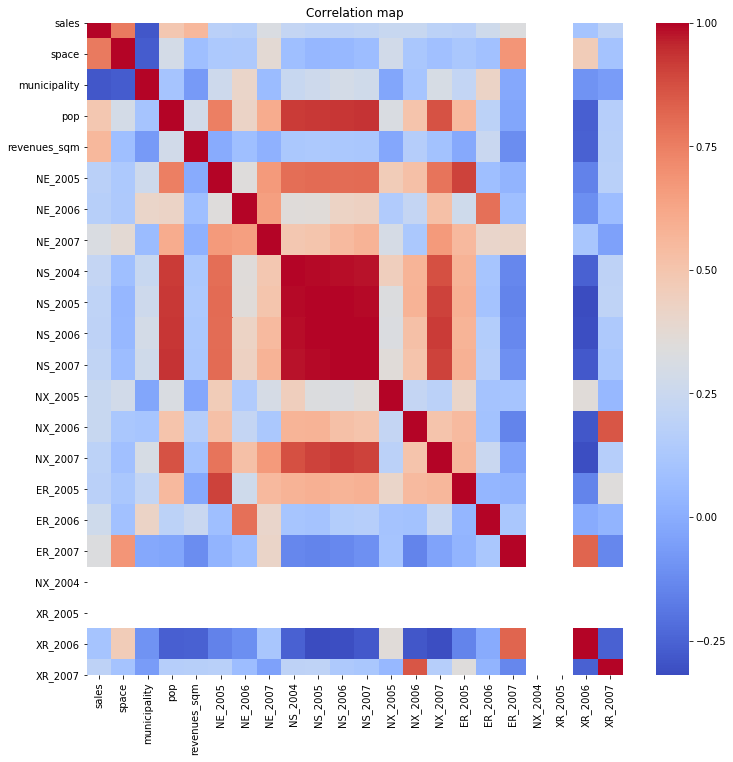

In [50]:
plt.figure(figsize=(12,12))
sb.heatmap(data=q56_mun.corr(),cmap='coolwarm')
plt.title('Correlation map')


plt.savefig("Fig12.png")

Below I will construct a small linear regression model to seee if variables in the dataset can explain the entry and exit rates of 2007.

In [ ]:
#select contenders for regressions, based on their correlation with the dependent variable.
#as correlation implies explicability.
reg_er = ['space','XR_2006','NE_2007','revenues_sqm', 'municipality']
reg_xr = ['NX_2006','NE_2007','ER_2005', 'municipality', 'XR_2006', 'ER_2007']

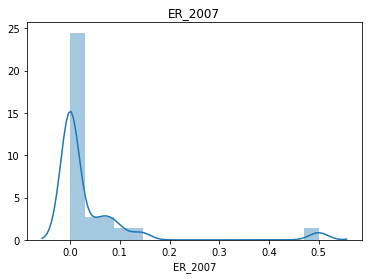

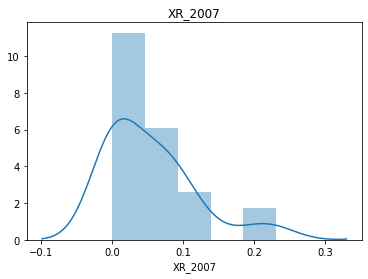

In [55]:
#Asses the distribution of both dependent vars
for x in 'ER_2007', 'XR_2007':
    sb.distplot(q56_mun[x])
    plt.title(x)
    plt.show()

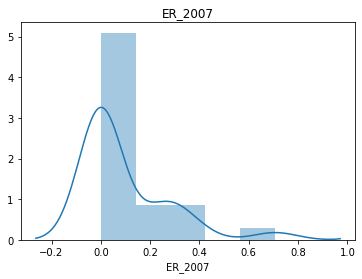

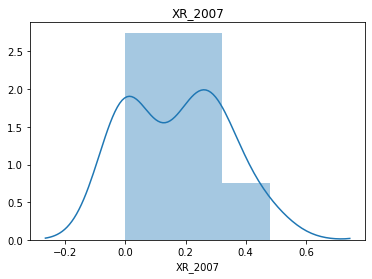

In [68]:
#will transform both variables using power transformation, to see if they can be more normally distributed (there are many 0 values, so the transformation cant be logarithmic, nor 1/x)
from feature_engine.variable_transformers import PowerTransformer
pt = PowerTransformer(variables=['ER_2007', 'XR_2007'])
pt.fit(q56_mun)
q56_mun= pt.transform(q56_mun)

#
for x in 'ER_2007', 'XR_2007':
    sb.distplot(q56_mun[x])
    plt.title(x)
    plt.show()
    

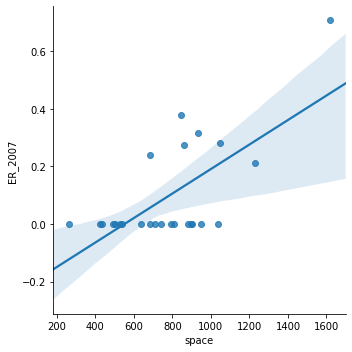

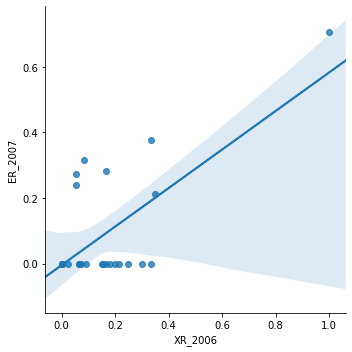

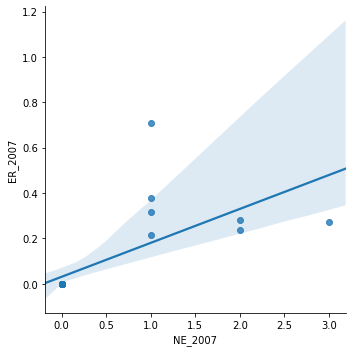

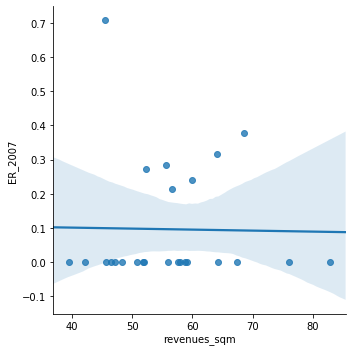

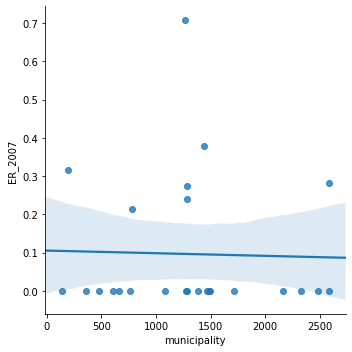

In [70]:
for expl in reg_er:
    sb.lmplot(data=q56_mun, x=expl, y='ER_2007')
    plt.show()

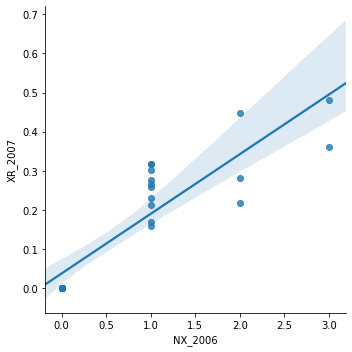

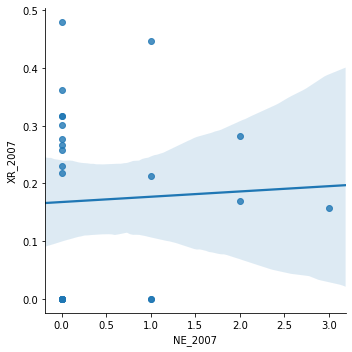

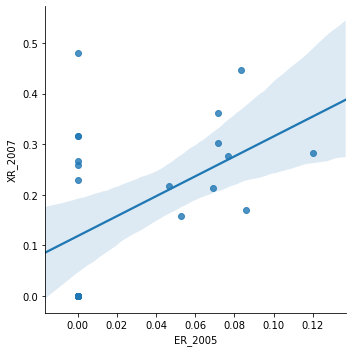

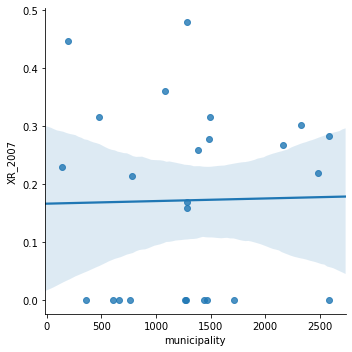

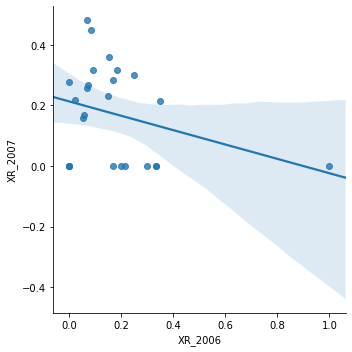

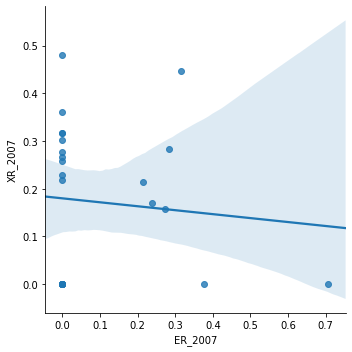

In [71]:
for expl in reg_xr:
    sb.lmplot(data=q56_mun, x=expl, y='XR_2007')
    plt.show()

In [81]:
#try a simple linear model using some of the parameters
import statsmodels.api as sm

Y = q56_mun['ER_2007']
X = q56_mun[reg_er]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

print('Coefficients:')
print(results.params)
print('\n')
print('t-values:')
print(results.tvalues)

Coefficients:
const          -0.264427
space           0.000156
XR_2006         0.457299
NE_2007         0.114623
revenues_sqm    0.001585
municipality    0.000016
dtype: float64


t-values:
const          -2.737531
space           2.439045
XR_2006         5.530328
NE_2007         6.057525
revenues_sqm    1.090474
municipality    0.766287
dtype: float64


significant variables:
- space
- previous year's exit rate
- number of stores this year

Endogeneity concerns prevail, since: number of stores this year directly affects the entry rate (higher NE, higher entry rate). So we can claim that NE can directly affect the error of the model as it is.

In [83]:
Y = q56_mun['XR_2007']
X = q56_mun[reg_xr]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

print('Coefficients:')
print(results.params)
print('\n')
print('t-values:')
print(results.tvalues)

Coefficients:
const           0.079842
NX_2006         0.145721
NE_2007        -0.032020
ER_2005         0.308465
municipality   -0.000019
XR_2006        -0.092282
ER_2007         0.106564
dtype: float64


t-values:
const           1.797686
NX_2006         6.429818
NE_2007        -0.811212
ER_2005         0.479684
municipality   -0.805263
XR_2006        -0.622859
ER_2007         0.473984
dtype: float64


significant variables:
- previous year's numberof exits.

Endogeneity concerns - significant. For the same reason as above - previous years exits are directly related to the dependent variable.